In [1]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import matplotlib.pyplot as plt

In [2]:
symbols = ["PYPL"]

In [3]:
data = pd.DataFrame()
for symbol in symbols:
    data[symbol] = web.DataReader(symbol, data_source="stooq",start="1/1/2010")["Close"]
data.columns = symbols

<AxesSubplot:xlabel='Date'>

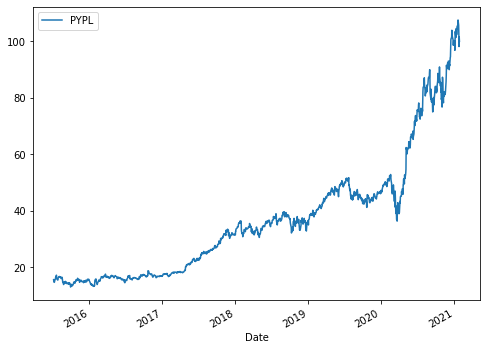

In [4]:
(data / data.iloc[0] * 100).plot(figsize=(8,6))

In [5]:
noa = len(symbols)
weights = np.random.random(noa)
weights /= np.sum(weights)
weights

array([1.])

In [6]:
rets = np.log(data / data.shift(1))
np.sum(rets.mean() * weights) * 252

-0.3329338193225136

In [7]:
prets = []
pvols = []
for p in range (2500):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    prets.append(np.sum(rets.mean() * weights) * 252)
    pvols.append(np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights))))
prets = np.array(prets)
pvols = np.array(pvols)

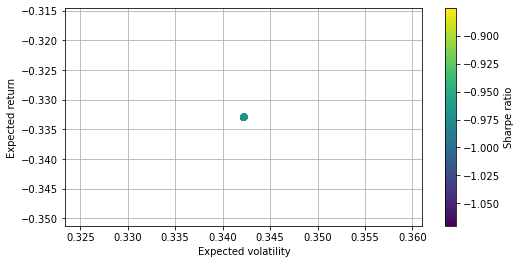

In [8]:
plt.figure(figsize=(8,4))
plt.scatter(pvols, prets, c=prets / pvols, marker='o')
plt.grid(True)
plt.xlabel("Expected volatility")
plt.ylabel("Expected return")
plt.colorbar(label="Sharpe ratio")